
0: 608x640 4 persons, 1 bicycle, 2 cars, 5 motorcycles, 302.1ms
Speed: 11.0ms preprocess, 302.1ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 640)


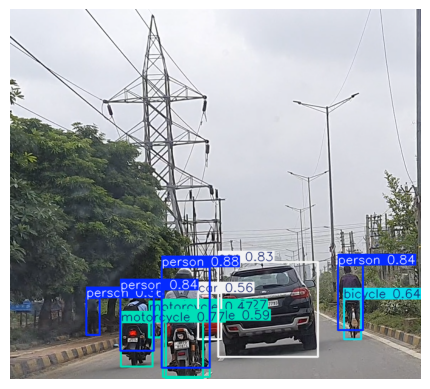

In [15]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO('yolov8s.pt')

image_path = r"Users\HP\Downloads\archive\Traffic Dataset\images\train"

# Detect objects in an image
def detect_objects(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found. Check the file path.")
        return
    
    # Perform detection
    results = model(image)
    
    # Annotate the image with detections
    annotated_image = results[0].plot()
    
    # Convert BGR to RGB for matplotlib
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    
    # Display using Matplotlib
    plt.imshow(annotated_image)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

# Corrected file path
detect_objects(r"C:\Users\HP\Downloads\archive\Traffic Dataset\images\test\00 (49).png")

In [26]:
import os
import shutil

# Paths to your dataset
images_path = r"C:\Users\HP\Downloads\archive\Traffic Dataset\images\train"
labels_path = r"C:\Users\HP\Downloads\archive\Traffic Dataset\labels\train"
output_path = r"C:\Users\HP\dataset" 

# Class names
class_names = ['stop', 'proceed', 'yield', 'class_3', 'class_4', 'class_5']

# Create class folders in output_path
for class_name in class_names:
    os.makedirs(os.path.join(output_path, class_name), exist_ok=True)

# Match images with labels and move to class folders
for label_file in os.listdir(labels_path):
    label_path = os.path.join(labels_path, label_file)

    try:
        with open(label_path, 'r') as f:
            lines = f.readlines()
            if not lines:
                print(f"Label file is empty: {label_file}")
                continue
            
            class_id = int(lines[0].split()[0])  # Read the first number as class ID
            if class_id >= len(class_names) or class_id < 0:
                print(f"Invalid class ID {class_id} in file: {label_file}")
                continue
            
            class_name = class_names[class_id]
    except Exception as e:
        print(f"Error processing label file {label_file}: {e}")
        continue

    # Find the corresponding image (handle both .jpg and .png)
    base_name = os.path.splitext(label_file)[0]  # Get the name without extension (e.g., 'image1')
    
    # Check if the image file exists as .jpg or .png
    image_name_jpg = base_name + '.jpg'
    image_name_png = base_name + '.png'

    image_path_jpg = os.path.join(images_path, image_name_jpg)
    image_path_png = os.path.join(images_path, image_name_png)

    # Prioritize jpg, if not found check for png
    if os.path.exists(image_path_jpg):
        image_path = image_path_jpg
    elif os.path.exists(image_path_png):
        image_path = image_path_png
    else:
        print(f"Image not found for label: {label_file}")
        continue

    # Move the image
    shutil.move(image_path, os.path.join(output_path, class_name))
    print(f"Moved: {image_name_jpg} or {image_name_png}")

Moved: 00 (10).jpg or 00 (10).png
Moved: 00 (100).jpg or 00 (100).png
Moved: 00 (102).jpg or 00 (102).png
Moved: 00 (103).jpg or 00 (103).png
Moved: 00 (105).jpg or 00 (105).png
Moved: 00 (11).jpg or 00 (11).png
Moved: 00 (118).jpg or 00 (118).png
Moved: 00 (119).jpg or 00 (119).png
Moved: 00 (120).jpg or 00 (120).png
Moved: 00 (121).jpg or 00 (121).png
Moved: 00 (122).jpg or 00 (122).png
Moved: 00 (123).jpg or 00 (123).png
Moved: 00 (124).jpg or 00 (124).png
Moved: 00 (125).jpg or 00 (125).png
Moved: 00 (126).jpg or 00 (126).png
Moved: 00 (127).jpg or 00 (127).png
Moved: 00 (128).jpg or 00 (128).png
Moved: 00 (129).jpg or 00 (129).png
Moved: 00 (13).jpg or 00 (13).png
Moved: 00 (142).jpg or 00 (142).png
Moved: 00 (143).jpg or 00 (143).png
Moved: 00 (144).jpg or 00 (144).png
Moved: 00 (145).jpg or 00 (145).png
Moved: 00 (146).jpg or 00 (146).png
Moved: 00 (147).jpg or 00 (147).png
Moved: 00 (148).jpg or 00 (148).png
Moved: 00 (149).jpg or 00 (149).png
Moved: 00 (150).jpg or 00 (150).pn

In [29]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths to your final organized dataset
output_path = r"C:\Users\HP\dataset2"  # Example output path
class_names = ['stop', 'proceed', 'yield', 'extra']  # Your class names

# Create train and test directories
train_dir = os.path.join(output_path, 'train')
test_dir = os.path.join(output_path, 'test')

# Create subdirectories for each class inside train and test folders
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create subdirectories for each class inside the train and test directories
for class_name in class_names:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Now, move images to train and test directories
for class_name in class_names:
    class_folder = os.path.join(output_path, class_name)  # Path to class folder
    images = os.listdir(class_folder)

    # Split images into train and test sets (80% train, 20% test)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Move the train images to the train directory
    for image in train_images:
        shutil.move(os.path.join(class_folder, image), os.path.join(train_dir, class_name, image))

    # Move the test images to the test directory
    for image in test_images:
        shutil.move(os.path.join(class_folder, image), os.path.join(test_dir, class_name, image))

print("Images have been successfully split into train and test directories.")

Images have been successfully split into train and test directories.


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation generator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Scale pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generator for the test data (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up train and test generators
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\HP\dataset2\train",  # Path to train data
    target_size=(64, 64),  # Resize images
    batch_size=32,
    class_mode='categorical'  # Assuming you are doing classification
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\HP\dataset2\test",  # Path to test data
    target_size=(64, 64),  # Resize images
    batch_size=32,
    class_mode='categorical'  # Assuming you are doing classification
)

Found 554 images belonging to 4 classes.
Found 140 images belonging to 4 classes.


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes: stop, proceed, yield, extra
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Save the trained model
model.save('traffic_sign_model.h5')

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 439ms/step - accuracy: 0.6592 - loss: 0.9471 - val_accuracy: 0.8071 - val_loss: 0.7268
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 375ms/step - accuracy: 0.8171 - loss: 0.6943 - val_accuracy: 0.8071 - val_loss: 0.6905
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 0.8539 - loss: 0.5567 - val_accuracy: 0.8071 - val_loss: 0.6485
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step - accuracy: 0.7965 - loss: 0.6484 - val_accuracy: 0.8214 - val_loss: 0.6072
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.8133 - loss: 0.6038 - val_accuracy: 0.8071 - val_loss: 0.6364
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.8331 - loss: 0.5381 - val_accuracy: 0.8286 - val_loss: 0.6175
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.8199 - loss: 0.5809 - val_accuracy: 0.8143 - val_loss: 0.5767
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.8202 - loss: 0.5563 - val_accuracy: 0.807

In [34]:
model.save(r"C:\Users\HP\Model\traffic_sign_model.keras")

In [35]:
# Evaluate on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.8363 - loss: 0.5242
Test Accuracy: 82.14%


In [65]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Class names corresponding to your model output
class_names = ['stop', 'proceed', 'yield', 'extra']

# Load a single image for prediction
img_path = r"C:\Users\HP\Downloads\pexels-carlosbasstos-29578957.jpg"
img = image.load_img(img_path, target_size=(64, 64))  # Resize to match the input size
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Get the class with the highest probability

# Map predicted class index to class name
predicted_class_name = class_names[predicted_class]

print(f"Predicted class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class: yield
